# Figures of Bonati and Ramirez (2021), in review

In [1]:
import subprocess
import pandas as pd
import numpy as np
import itertools
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from scipy.interpolate import griddata
import os
plots_folder = 'Figures/'

In [2]:
nbelts = 36

## Figure 2

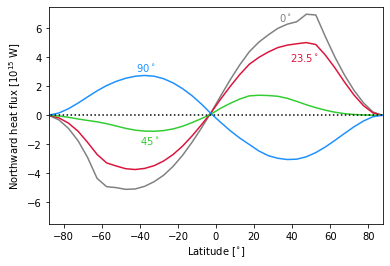

In [3]:
df = pd.read_csv('../code/out/model_235.out', header=None)
df = pd.DataFrame(df[0].str.split(' ').tolist())

belts = 36   # Number of latitudinal belts
D = 0.58     # Diffusion coefficient Earth (Wm-2)
R = 6.378e6  # Earth radius (m)
lat = np.arange(-87.5,92.5,5,dtype=None)
latrad = lat*np.pi/180
x= np.sin(latrad)

# Average temperature from text file
tave = df.iloc[56:72,14]
tave = tave.append(df.iloc[72:74,15])
tave = tave.append(df.iloc[74:76,16])
tave = tave.append(df.iloc[76:92,15])
tave = np.array(tave, dtype = np.float32)

tgrad = np.zeros((belts-1,1),dtype=np.float32)
Flam = np.zeros((belts,1),dtype=np.float32)
Flam90 = np.zeros((belts,1),dtype=np.float32)
Flam0 = np.zeros((belts,1),dtype=np.float32)
Flam45 = np.zeros((belts,1),dtype=np.float32)

for i in range(len(tgrad)):
    tgrad[i]= (tave[i+1] - tave[i])/(x[i] - x[i+1])
    Flam[i] = (2*np.pi*R**2*D*(1 - x[i]**2)*tgrad[i])/1e15
    
df = pd.read_csv('../code/out/model_90.out', header=None)
df = pd.DataFrame(df[0].str.split(' ').tolist())

# Average temperature from text file
tave = df.iloc[56:72,14]
tave = tave.append(df.iloc[72:74,15])
tave = tave.append(df.iloc[74:76,16])
tave = tave.append(df.iloc[76:92,15])
tave = np.array(tave, dtype = np.float32)

for i in range(len(tgrad)):
    tgrad[i]= (tave[i+1] - tave[i])/(x[i] - x[i+1])
    Flam90[i] = (2*np.pi*R**2*D*(1 - x[i]**2)*tgrad[i])/1e15
    
df = pd.read_csv('../code/out/model_0.out', header=None)
df = pd.DataFrame(df[0].str.split(' ').tolist())

# Average temperature from text file
tave = df.iloc[56:72,14]
tave = tave.append(df.iloc[72:74,15])
tave = tave.append(df.iloc[74:76,16])
tave = tave.append(df.iloc[76:92,15])
tave = np.array(tave, dtype = np.float32)

for i in range(len(tgrad)):
    tgrad[i]= (tave[i+1] - tave[i])/(x[i] - x[i+1])
    Flam0[i] = (2*np.pi*R**2*D*(1 - x[i]**2)*tgrad[i])/1e15

df = pd.read_csv('../code/out/model_45.out', header=None)
df = pd.DataFrame(df[0].str.split(' ').tolist())

# Average temperature from text file
tave = df.iloc[56:72,14]
tave = tave.append(df.iloc[72:74,15])
tave = tave.append(df.iloc[74:76,16])
tave = tave.append(df.iloc[76:92,15])
tave = np.array(tave, dtype = np.float32)

for i in range(len(tgrad)):
    tgrad[i]= (tave[i+1] - tave[i])/(x[i] - x[i+1])
    Flam45[i] = (2*np.pi*R**2*D*(1 - x[i]**2)*tgrad[i])/1e15

# Flam45[35] = 0.001
# Flam0[35] = 0.001
# Flam90[35] = 0.001
# Flam[35] = 0.001

plt.figure()
lat_plot = np.zeros((belts-1,1),dtype=np.float32)

for i in range(len(lat)-1):
    lat_plot[i,0] = lat[i]
plt.plot(lat,Flam0, label='0$^\circ$',c='gray')
plt.plot(lat,Flam,label='23.5$^\circ$',c='crimson')
plt.plot(lat,Flam45, label='45$^\circ$',c='limegreen')
plt.plot(lat,Flam90, label='90$^\circ$',c='dodgerblue')
plt.xlabel('Latitude [$^{\circ}$]')
plt.text(33,6.5,'0$^\circ$',color='gray')
plt.text(39,3.7,'23.5$^\circ$',color='crimson')
plt.text(-40,-2,'45$^\circ$',color='limegreen')
plt.text(-42,3,'90$^\circ$',color='dodgerblue')
plt.axhline(0,-88,85,linestyle=':',color='k')
plt.xlim([-88, 88])
plt.ylim([-7.5, 7.5])
plt.ylabel('Northward heat flux [$10^{15}$ W]')
plt.savefig(plots_folder+'Fig_2.pdf', bbox_inches='tight',format='pdf')
plt.show()

## Panels for Figures 3 and 5

In [4]:
# ONLY THESE 3 PARAMETERS NEED TO BE VARIED
start = ["Cold"] # Start: "Cold" or "Warm" --> Cold: Tsurf=230K, Warm: Tsurf=270K 
STAR = ["Sun"]   # Host star: "Sun" or "K5" or "F0"
obl = ["23.5"]   # Planetary obliquity: "23.5" or "0."

# Other parameters
val = ["0.001"]  
ocean = ["0.7"] # Ocean/land fraction
igeog = ["1"]   # Geographical distribution of land and ice. 1: Earth, 4: Aquaplanet, 5: Land planet
pco2i = ["3.0","2.75","2.5","2.25","2.0","1.75","1.5","1.25","1.0","0.75","0.5","0.25","0.1","0.05","0.01"] # CO2 pressures

if start==["Cold"]:
    icoldflag = ["1"]
else:
    icoldflag = ["0"]

if STAR == ["Sun"]:
    smass = ["1.0"]
    a0 = ["1.00","1.025","1.05","1.075","1.10","1.125","1.15","1.175","1.20","1.225","1.25","1.275","1.30","1.325","1.35","1.375","1.40","1.425","1.45","1.475","1.5"]
elif STAR == ["K5"]:
    smass = ["0.6"]
    a0 = ["0.40","0.41","0.42","0.43","0.44","0.45","0.46","0.47","0.48","0.491","0.5","0.51","0.52","0.53","0.54","0.55","0.56","0.57","0.58","0.59","0.6"]
else:
    smass = ["1.5"]
    a0 = ["2.00","2.05","2.10","2.15","2.20","2.25","2.30","2.35","2.40","2.45","2.50","2.55","2.601","2.65","2.70","2.75","2.801","2.85","2.90","2.95","3.00"]
    
a_max = max(float(sub) for sub in a0) 
a_min = min(float(sub) for sub in a0) 
sem_ax_plot = np.linspace(a_min,a_max,len(a0))
sem_ax_plot = np.reshape(sem_ax_plot, (len(a0)))
sem_ax_plot = np.array([sem_ax_plot,]*len(pco2i))

pco2_plot = [3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,0.75,0.5,0.25,0.1,0.05,0.01]
pco2_plot = np.array([pco2_plot,]*len(a0)).transpose()

os.chdir('../code/')
with open("input_ebm.dat", "r") as f:
    main = f.read()
    
splitfile = main.split('\n')

gl = np.zeros((len(pco2i),len(a0)),dtype=np.float32)
CO2_ice = np.zeros((len(pco2i),len(a0)),dtype=np.float32)

s=0 
n=0

var = ["icoldflag","obl","a0","pco2i","ocean","igeog","STAR","smass","val"]  

for i in itertools.product(icoldflag,obl,a0,pco2i,ocean,igeog,STAR,smass,val):
    
    a,b,c,d,e,f,g,h,k = i            
    print (i)
    
    with open("input_ebm.dat", "r") as f:
        main = f.read()
        for j, line in enumerate(splitfile):
            if var[0] in line:
                splitfile[j] = 'icoldflag:       %s' % i[0]
            if var[1] in line:
                splitfile[j] = 'obl:             %s' % i[1]
            if var[2] in line:
                splitfile[j] = 'a0:              %s' % i[2]            
            if var[3] in line:
                splitfile[j] = 'pco2i:           %s' % i[3] 
            if var[4] in line:
                splitfile[j] = 'ocean:           %s' % i[4]            
            if var[5] in line:
                splitfile[j] = 'igeog:           %s' % i[5]   
            if var[6] in line:
                splitfile[j] = 'STAR:      %s' % i[6]
            if var[7] in line:
                splitfile[j] = 'smass:           %s' % i[7] 
            if var[8] in line:
                splitfile[j] = 'val:     %s' % i[8] 
        
        with open("input_ebm.dat", "w") as f:
            f.write('\n'.join(splitfile))
        
        if j==0:
            subprocess.call(['make clean'], shell=True)
            subprocess.call(['make'], shell=True)             
        subprocess.call(['./driver'],shell=True)
    
        df = pd.read_csv('out/model.out', header=None)
        df = pd.DataFrame(df[0].str.split(' ').tolist())
        
        # Read CO2 surface ice
        for m in range(len(df)):
            if df.iloc[m,2] == "atmospheric" and df.iloc[m,10]!=None:
                CO2_ice[n,s] = df.iloc[m,10]
                break
            elif df.iloc[m,2] == "atmospheric" and df.iloc[m,10]==None:
                CO2_ice[n,s] = df.iloc[m,9]
                break 
        
        # Read average surface temperature from text file
        temp_av = df.iloc[56:72,14]
        temp_av = temp_av.append(df.iloc[72:74,15])
        temp_av = temp_av.append(df.iloc[74:76,16])
        temp_av = temp_av.append(df.iloc[76:92,15])
        temp_av = np.array(temp_av, dtype = np.float32)

        # 1: Snowball planet, 4: Ice-free planet, 2: Partially ice-free with condensed CO2  3: Partially ice-free with no condensed CO2
        if all(i < 263 for i in temp_av) and CO2_ice[n,s]>0.:
            gl[n, s] = 1 # dark blue
            print ('Surface temperatures all below 263, blue')
        elif all(k > 263 for k in temp_av):
            gl[n,s] = 4 # dark red
            print ('Ice-free, red')
            CO2_ice[n,s] = 0. 
                
        else:
            
            if any(p<216.6 for p in temp_av) and CO2_ice[n,s]>0.:
                gl[n,s] = 2 # light blue
                print ('Ice with CO2 condensation, light blue')
            else:
                gl[n,s] = 3 # light red
                print ('Some ice but no CO2 condensation, light red')
                CO2_ice[n,s] = 0.
        print (CO2_ice[n,s])
        if CO2_ice[n,s] < 1 and CO2_ice[n,s]>0.:
            CO2_ice[n,s] = 1.01
        
    if n==len(pco2i)-1:
        n=n-(len(pco2i)-1)
        s+=1
    else:
        n+=1

('1', '23.5', '1.00', '3.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '2.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '2.5', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '2.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '2.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '1.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '1.5', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '1.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '1.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '0.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '0.5', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.00', '0.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.

Ice-free, red
0.0
('1', '23.5', '1.15', '2.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '2.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '1.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '1.5', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '1.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '1.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '0.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.15', '0.5', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
67.85
('1', '23.5', '1.15', '0.25', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
87.93
('1', '23.5', '1.15', '0.1', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
90.49
('1', '23.5', '1.15', '0.05', '0.7', '1', 'Sun', '1.0', '0.001')
Surfa

Surface temperatures all below 263, blue
81.96
('1', '23.5', '1.275', '0.01', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
13.91
('1', '23.5', '1.30', '3.0', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.30', '2.75', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.30', '2.5', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.30', '2.25', '0.7', '1', 'Sun', '1.0', '0.001')
Ice-free, red
0.0
('1', '23.5', '1.30', '2.0', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
46.63
('1', '23.5', '1.30', '1.75', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
60.58
('1', '23.5', '1.30', '1.5', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
69.69
('1', '23.5', '1.30', '1.25', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
77.9
('1', '23.5', '1.30', '1.0', '0.7', '1', 'Sun', '1.0', '0.001')
S

Surface temperatures all below 263, blue
80.96
('1', '23.5', '1.40', '0.01', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
12.66
('1', '23.5', '1.425', '3.0', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
65.41
('1', '23.5', '1.425', '2.75', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
70.2
('1', '23.5', '1.425', '2.5', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
74.12
('1', '23.5', '1.425', '2.25', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
77.55
('1', '23.5', '1.425', '2.0', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
83.47
('1', '23.5', '1.425', '1.75', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
88.16
('1', '23.5', '1.425', '1.5', '0.7', '1', 'Sun', '1.0', '0.001')
Surface temperatures all below 263, blue
91.77
('1', '23.5', '1.425', '1.25', '0.7', '1', 'Sun', '1.0'

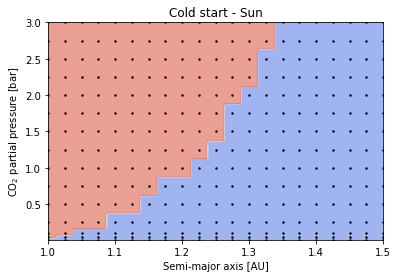

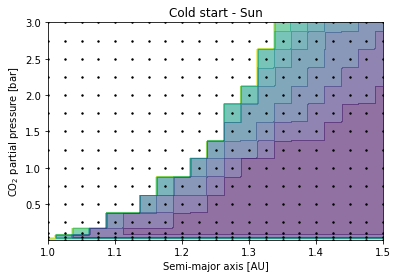

In [5]:
from matplotlib.colors import ListedColormap, BoundaryNorm
gl0 = np.reshape(gl, (len(gl[0])*len(gl),1))
ice = np.reshape(CO2_ice, (len(gl[0])*len(gl),1))
sa_plot = np.reshape(sem_ax_plot, (len(sem_ax_plot[0])*len(sem_ax_plot),1))
pc_plot = np.reshape(pco2_plot, (len(pco2_plot[0])*len(pco2_plot),1))
points = np.column_stack((sa_plot,pc_plot))
a_max = max(float(sub) for sub in a0) 
a_min = min(float(sub) for sub in a0)
pco2_max = max(float(sub) for sub in pco2i) 
pco2_min = min(float(sub) for sub in pco2i) 

xi,yi = np.mgrid[a_min:a_max:200j, pco2_min:pco2_max:200j]

if STAR==["K5"]:        
    STAR = ["K5 star"]
elif STAR==["F0"]:        
    STAR = ["F0 star"]
    
zi = griddata(points, gl0, (xi, yi), method="nearest").reshape(200, 200)
zice = griddata(points, ice, (xi, yi), method="nearest").reshape(200, 200)
    
zi = np.around(zi)
size =2
ax=plt.gca()

plt.figure(1)
plt.contourf(xi,yi,zi,levels=[0,1,2,3,4],cmap="coolwarm", alpha=0.6)
plt.scatter(sem_ax_plot,pco2_plot,color='black', s=size)
plt.xlabel('Semi-major axis [AU]')
plt.ylabel('CO$_{2}$ partial pressure [bar]')
plt.xlim([a_min,a_max])
plt.ylim([0.01,3])
if obl == ["0"]:
    plt.title('{} start - {} %.0f obliquity'.format(start[0],STAR[0]) %(np.float(obl[0])))
else:
    plt.title('{} start - {} %.1f obliquity'.format(start[0],STAR[0]) %(np.float(obl[0])))  
    plt.title('{} start - {}'.format(start[0],STAR[0]))  
if STAR==["K5 star"]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.05))
    ax.xaxis.set_minor_locator(MultipleLocator(0.02))
if STAR==["F0 star"]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
plt.savefig('Figures/0{}_{}_%.1f.pdf'.format(start[0],STAR[0]) %(np.float(obl[0])), bbox_inches='tight',format='pdf')
plt.show()

plt.figure(2)
lev_CO2 = [1,10,20,30,40,50,60,70,80,90,100]
ax=plt.gca()
sc =plt.contourf(xi,yi,zice,levels=lev_CO2,cmap="viridis_r", alpha=0.6)#,norm=colors.LogNorm(vmin=0.001, vmax=100))
plt.scatter(sem_ax_plot,pco2_plot,color='black', s=size)
#cb = plt.colorbar(sc,orientation='horizontal')
#cb.set_label('Atmospheric $CO_{2}$ loss to surface [%]')
plt.xlabel('Semi-major axis [AU]')
plt.ylabel('CO$_{2}$ partial pressure [bar]')
plt.xlim([a_min,a_max])
plt.ylim([0.01,3])
if obl == ["0"]:
    plt.title('{} start - {} %.0f obliquity'.format(start[0],STAR[0]) %(np.float(obl[0])))
else:
    plt.title('{} start - {} %.1f obliquity'.format(start[0],STAR[0]) %(np.float(obl[0])))  
    plt.title('{} start - {}'.format(start[0],STAR[0]))  
if STAR==["K5 star"]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.05))
    ax.xaxis.set_minor_locator(MultipleLocator(0.02))
if STAR==["F0 star"]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
plt.savefig('Figures/0ice{}_{}_%.1f.pdf'.format(start[0],STAR[0]) %(np.float(obl[0])), bbox_inches='tight',format='pdf')
plt.show()

## Figure 4

In [9]:
# ONLY THIS PARAMETER NEEDS TO BE VARIED
start = ["Cold"] # Start: "Cold" or "Warm" --> Cold: Tsurf=230K, Warm: Tsurf=270K 

STAR = ["F0","Sun","K5"]    # Host star
smass = ["1.5","1.0","0.6"] # Stellar mass
a0 = ["2.5","1.25","0.53"]  # Orbital distance
obl = ["0.","23.5"]         # Plentary obliquity
ocean = ["0.7"]             # Ocean/land fraction
igeog = ["1"]               # Earth-like continental configuration
pco2i = ["1."]             # Initial atmospheric CO2 pressure

if start==["Cold"]:
    icoldflag = ["1"]
else:
    icoldflag = ["0"]

os.chdir('../code/')
with open("input_ebm.dat", "r") as f:
    main = f.read()
    
splitfile = main.split('\n')

temp_ave = np.zeros((nbelts,len(a0)*2),dtype=np.float32)
temp_mi = np.zeros((nbelts,len(a0)*2),dtype=np.float32)
temp_ma = np.zeros((nbelts,len(a0)*2),dtype=np.float32)
latitude_plot = np.zeros((nbelts,len(a0)*2),dtype=np.float32)
CO2_ice = np.zeros((nbelts,len(a0)*2),dtype=np.float32)

s=0 
n=0

var = ["icoldflag","obl","a0","pco2i","ocean","igeog","STAR","smass","val"]

for b in range(len(obl)):
    for c in range(len(STAR)):
            if b==0:
                val=["0.001","0.001","0.001"]
            else:
                val=["0.001","0.001","0.001"]
            print (icoldflag,obl[b],a0[c],pco2i,ocean,igeog,STAR[c],smass[c],val[c])
            obl_t = obl[b]
            
            with open("input_ebm.dat", "r") as f:
                main = f.read()
                for j, line in enumerate(splitfile):
                    if var[0] in line:
                        splitfile[j] = 'icoldflag:       %s' % icoldflag[0]
                    if var[1] in line:
                        splitfile[j] = 'obl:             %s' % obl[b]
                    if var[2] in line:
                        splitfile[j] = 'a0:              %s' % a0[c]            
                    if var[3] in line:
                        splitfile[j] = 'pco2i:           %s' % pco2i[0] 
                    if var[4] in line:
                        splitfile[j] = 'ocean:           %s' % ocean[0]            
                    if var[5] in line:
                        splitfile[j] = 'igeog:           %s' % igeog[0]   
                    if var[6] in line:
                        splitfile[j] = 'STAR:      %s' % STAR[c]
                    if var[7] in line:
                        splitfile[j] = 'smass:           %s' % smass[c]    
                    if var[8] in line:
                        splitfile[j] = 'val:     %s' % val[c] 
        
                with open("input_ebm.dat", "w") as f:
                    f.write('\n'.join(splitfile))              

        
                if j==0:
                    subprocess.call(['make clean'], shell=True)
                    subprocess.call(['make'], shell=True)
            
                subprocess.call(['./driver'],shell=True)
            
                df = pd.read_csv('out/model.out', header=None)
                df = pd.DataFrame(df[0].str.split(' ').tolist())
        
                #Average temperature from text file
                temp_av = df.iloc[56:72,14]
                temp_av = temp_av.append(df.iloc[72:74,15])
                temp_av = temp_av.append(df.iloc[74:76,16])
                temp_av = temp_av.append(df.iloc[76:92,15])
                temp_av = np.array(temp_av, dtype = np.float32)
                
#                 print ("Average temperatures", temp_av)
                
                pCO2_final = df.iloc[47,8]
                print ("Final atmospheric CO2 atmospheric pressure =", pCO2_final)
                
                # Minimum temperature from text file
                temp_min = df.iloc[56:72,20]
                temp_min = temp_min.append(df.iloc[72:74,21])
                temp_min = temp_min.append(df.iloc[74:76,22])
                temp_min = temp_min.append(df.iloc[76:92,21])
                temp_min = np.array(temp_min, dtype = np.float32)
                
                # Maximum temperature from text file
                temp_max = df.iloc[56:72,25]
                temp_max = temp_max.append(df.iloc[72:74,26])
                temp_max = temp_max.append(df.iloc[74:76,27])
                temp_max = temp_max.append(df.iloc[76:92,26])
                temp_max = np.array(temp_max, dtype = np.float32)
                
#                 print ("Minimum temperatures", temp_min)
#                 print ("Maximum temperatures", temp_max)
                
                latitude = df.iloc[56:72,4]
                latitude = latitude.append(df.iloc[72:74,5])
                latitude = latitude.append(df.iloc[74:76,6])
                latitude = latitude.append(df.iloc[76:92,5])
                latitude = np.array(latitude, dtype = np.float32)
                
                temp_ave[:,n] = temp_av
                temp_ma[:,n] = temp_max
                temp_mi[:,n] = temp_min
                latitude_plot[:,n]=latitude
                
                # CO2 surface ice
                for m in range(len(df)):
                    if df.iloc[m,2] == "atmospheric" and df.iloc[m,10]!=None:
                        CO2_ice[n,s] = df.iloc[m,10]
                        break
                    elif df.iloc[m,2] == "atmospheric" and df.iloc[m,10]==None:
                        CO2_ice[n,s] = df.iloc[m,9]
                    if CO2_ice[n,s]<0:
                        exit
                        break
                print ("Fraction of CO2 lost to the surface =", CO2_ice[n,s]) 

                n+=1

['1'] 0. 2.5 ['1.'] ['0.7'] ['1'] F0 1.5 0.001
Final atmospheric CO2 atmospheric pressure = 6.90954E-02
Fraction of CO2 lost to the surface = 93.09
['1'] 0. 1.25 ['1.'] ['0.7'] ['1'] Sun 1.0 0.001
Final atmospheric CO2 atmospheric pressure = 3.95634E-01
Fraction of CO2 lost to the surface = 60.44
['1'] 0. 0.53 ['1.'] ['0.7'] ['1'] K5 0.6 0.001
Final atmospheric CO2 atmospheric pressure = 8.35496E-01
Fraction of CO2 lost to the surface = 16.45
['1'] 23.5 2.5 ['1.'] ['0.7'] ['1'] F0 1.5 0.001
Final atmospheric CO2 atmospheric pressure = 4.22528E-02
Fraction of CO2 lost to the surface = 95.77
['1'] 23.5 1.25 ['1.'] ['0.7'] ['1'] Sun 1.0 0.001
Final atmospheric CO2 atmospheric pressure = 2.48810E-01
Fraction of CO2 lost to the surface = 75.12
['1'] 23.5 0.53 ['1.'] ['0.7'] ['1'] K5 0.6 0.001
Final atmospheric CO2 atmospheric pressure = 8.94591E-01
Fraction of CO2 lost to the surface = 10.54


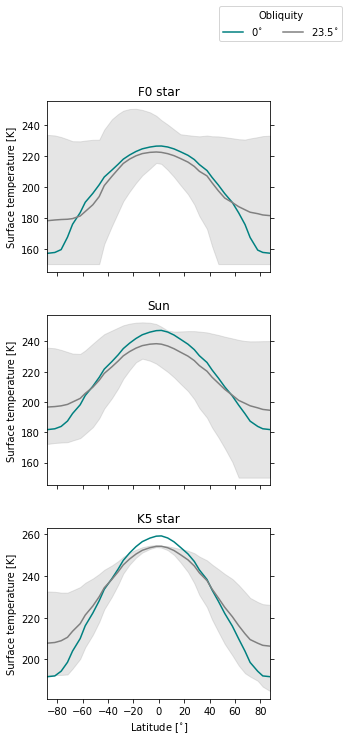

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(4, 11), sharex=True)
plt.subplots_adjust(hspace=0.25)
for i in range(temp_ave.shape[1]):
        
    latitude = latitude_plot[:,i]

stars=["F0 star", "Sun", "K5 star"]
for i in range(3):
    #ax[i].fill_between(latitude,temp_mi[:,i],temp_ma[:,i],color='teal',alpha=0.2)
    ax[i].fill_between(latitude,temp_mi[:,i+3],temp_ma[:,i+3],color='grey',alpha=0.2)
    av_lowobl=ax[i].plot(latitude,temp_ave[:,i],color='teal',label='$0^{\circ}$')
    av_highobl=ax[i].plot(latitude,temp_ave[:,i+3],color='grey',label='$23.5^{\circ}$')
    ax[i].set_xlim([-88, 88])
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_ylabel("Surface temperature [K]")
    ax[i].set_title('{}'.format(stars[i]))
    ax[i].set_xticks(np.arange(-80, 80+20, 20.))
ax[0].legend(title='Obliquity',ncol=len(df.columns),loc=(0.77,1.35))
plt.setp(av_lowobl[1:], label="_")
plt.setp(av_highobl[1:], label="_")
plt.xlabel("Latitude [$^{\circ}$]")
plt.savefig('Figures/Fig_5_icold{}_a{}_EQ.pdf'.format(icoldflag[0],a0[0]), bbox_inches='tight',format='pdf')
plt.show()

## Figure 6: Comparison with Hoffman Figure 8A 

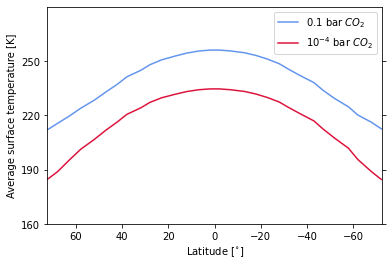

In [9]:
filenames = ['out/HM01.out','out/HM1e-4.out']
labels = ["0.1 bar $CO_{2}$", "$10^{-4}$ bar $CO_{2}$"]
colors = ["cornflowerblue","crimson"]

plt.figure()
for i in range(len(filenames)):
    df = pd.read_csv(filenames[i], header=None)
    df = pd.DataFrame(df[0].str.split(' ').tolist())
        
    #Average temperature from text file
    temp_av = df.iloc[56:72,14]
    temp_av = temp_av.append(df.iloc[72:74,15])
    temp_av = temp_av.append(df.iloc[74:76,16])
    temp_av = temp_av.append(df.iloc[76:92,15])
    temp_av = np.array(temp_av, dtype = np.float32)
                
    temp_av_value = df.iloc[42,7]

    latitude = df.iloc[56:72,4]
    latitude = latitude.append(df.iloc[72:74,5])
    latitude = latitude.append(df.iloc[74:76,6])
    latitude = latitude.append(df.iloc[76:92,5])
    latitude = np.array(latitude, dtype = np.float32)
    
    plt.plot(latitude,temp_av,color=colors[i],label=labels[i])
plt.legend()
plt.xlabel("Latitude [$^{\circ}$]")
plt.ylabel("Average surface temperature [K]")
plt.xlim([72.5, -72.5])
plt.ylim([160,280])
plt.yticks(np.arange(160, 280, 30))
ax = plt.gca()
ax.yaxis.set_ticks_position('both')
plt.savefig('Figures/Fig_6.pdf', bbox_inches='tight',format='pdf')
plt.show()